In [1]:
# Import dependencies.
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key

In [2]:
# Create 50 randomly generated latitudes and longitudes 

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(83.48052880396622, 51.04322036961733),
 (-69.15753150616642, 136.9073318140854),
 (10.121059014707612, 96.99103643359678),
 (16.36876027719798, 99.56362097751071),
 (-39.631477707326994, -142.8649991018349),
 (66.42875306748596, -140.88692247454665),
 (33.41259496556856, 65.08197964945595),
 (-29.62309911341626, 55.99412955892251),
 (-0.36749322857437505, 177.83964581055864),
 (-4.136526506232229, 126.6012495803891),
 (36.829842548972294, 61.61161299807176),
 (-8.469033241036996, -108.35435700345577),
 (-51.26234400077574, -115.31913570420875),
 (6.609952663178433, 41.02302114038258),
 (-38.73322304595078, 25.10159341140607),
 (23.450288299481016, 4.1976866476094585),
 (5.284768216835431, 21.89092521251797),
 (-16.872919879060547, -20.36030539197108),
 (-86.73106739785655, 165.85162871857483),
 (-10.317453350087007, 119.82870243697204),
 (75.53316131725745, 34.69696831402018),
 (59.29916917606096, -149.47659180466994),
 (-3.741580834800942, -175.45308389301445),
 (21.323230612584197,

In [4]:
# Create an empty list to hold the city names.
cities = []

# Create an empty list to hold the weather data.
city_data = []

# Use the tuple() function to display the city name with the given latitude and longitude combinations.
for coordinate in coordinates:
    cities.append(citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

belushya guba ru
new norfolk au
ranong th
kamphaeng phet th
mataura pf
mayo ca
taywarah af
saint-joseph re
rungata ki
ambon id
sarakhs ir
puerto ayora ec
rikitea pf
ginir et
kruisfontein za
tessalit ml
kembe cf
georgetown sh
bluff nz
waingapu id
vardo no
sterling us
vaitupu wf
kapaa us
dikson ru
alto piquiri br
kaitangata nz
mataura pf
port alfred za
ushuaia ar
vaini to
sentyabrskiy ru
bethel us
tsihombe mg
mount gambier au
kaitangata nz
panzhihua cn
maragogi br
xichang cn
saskylakh ru
cape town za
busselton au
sicamous ca
bethel us
mitu co
lanas ph
sibolga id
hithadhoo mv
albany au
atchison us


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a516769bbf338d45aaab9eaf1205d742


In [6]:
# Perform an API Call on the first data to see JSON structure
weather_url = "http://api.openweathermap.org/data/2.5/weather?q=" + cities[0] + "&APPID=" + weather_api_key
print(weather_url)

http://api.openweathermap.org/data/2.5/weather?q=belushya guba&APPID=a516769bbf338d45aaab9eaf1205d742


In [7]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_country = city_weather["sys"]["country"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country" : city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | ranong
Processing Record 4 of Set 1 | kamphaeng phet
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | mayo
Processing Record 7 of Set 1 | taywarah
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | rungata
City not found. Skipping...
Processing Record 10 of Set 1 | ambon
Processing Record 11 of Set 1 | sarakhs
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | ginir
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | tessalit
Processing Record 17 of Set 1 | kembe
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | waingapu
Processing Record 21 of Set 1 | vardo
Processing Record 22 of Set 1

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,New Norfolk,AU,-42.7826,147.0587,49.91,72,84,1.99,broken clouds
1,Ranong,TH,9.9658,98.6348,79.74,85,90,1.63,overcast clouds
2,Kamphaeng Phet,TH,16.2500,99.5000,82.13,71,26,3.20,scattered clouds
3,Mataura,NZ,-46.1927,168.8643,49.48,93,49,2.62,scattered clouds
4,Mayo,US,38.8876,-76.5119,82.24,67,1,8.01,clear sky
5,Taywarah,AF,33.3500,64.4167,56.53,27,0,4.21,clear sky
6,Saint-Joseph,RE,-21.3667,55.6167,69.48,80,92,14.56,overcast clouds
7,Ambon,ID,-3.6954,128.1814,75.34,94,75,8.14,moderate rain
8,Sarakhs,IR,36.5449,61.1577,84.34,39,0,0.00,clear sky
9,Puerto Ayora,EC,-0.7393,-90.3518,82.36,82,77,5.99,broken clouds


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

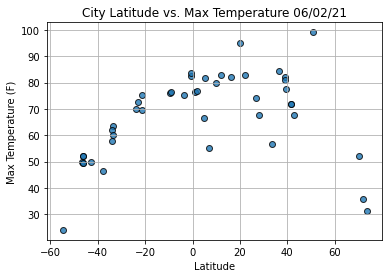

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

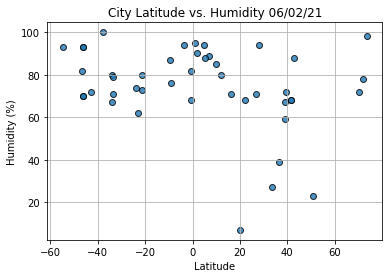

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

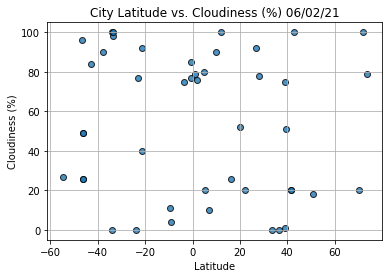

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

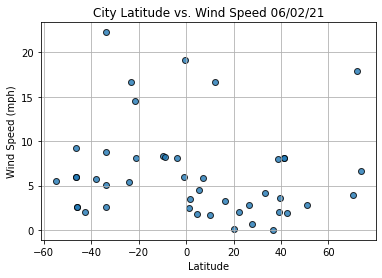

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
1,Ranong,TH,9.9658,98.6348,79.74,85,90,1.63,overcast clouds
2,Kamphaeng Phet,TH,16.2500,99.5000,82.13,71,26,3.20,scattered clouds
4,Mayo,US,38.8876,-76.5119,82.24,67,1,8.01,clear sky
5,Taywarah,AF,33.3500,64.4167,56.53,27,0,4.21,clear sky
8,Sarakhs,IR,36.5449,61.1577,84.34,39,0,0.00,clear sky


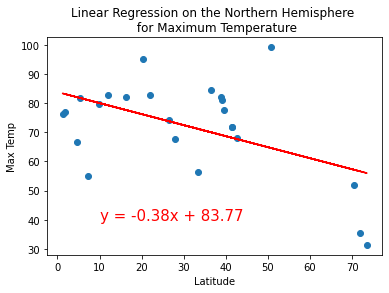

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

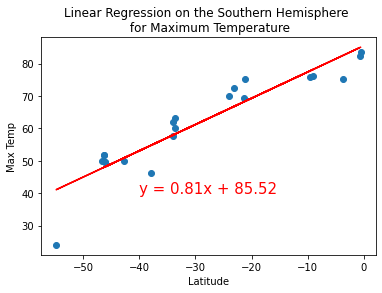

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-40, 40))

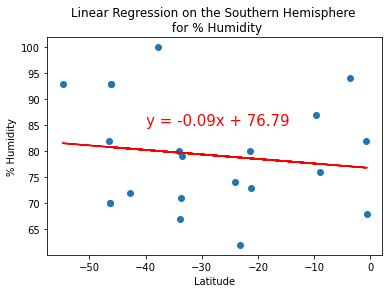

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-40, 85))

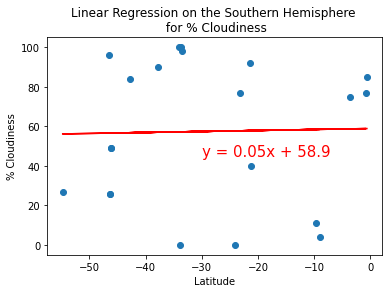

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-30, 45))

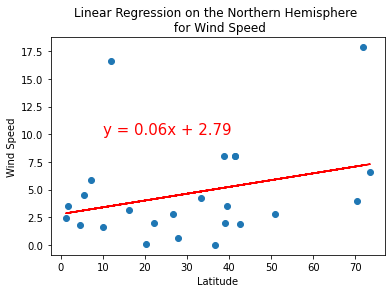

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,10))

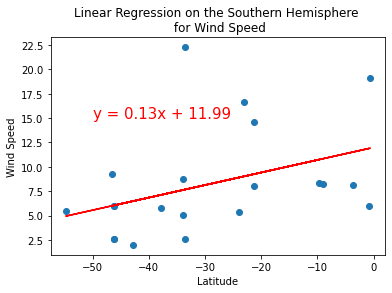

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))